In [2]:
#Import libraries and load data from txt
import numpy as np
import pandas as pd

arpi = pd.read_csv("C:\prog\Matlab\\line_arpi.txt", delimiter=' ', header=None)
csilla = pd.read_csv("C:\prog\Matlab\\line_csilla.txt", delimiter=' ', header=None)
katica = pd.read_csv("C:\prog\Matlab\\line_katica.txt", delimiter=' ', header=None)
mate = pd.read_csv("C:\prog\Matlab\\line_mate.txt", delimiter=' ', header=None)
norbi = pd.read_csv("C:\prog\Matlab\\line_norbi.txt", delimiter=' ', header=None)
rozsa = pd.read_csv("C:\prog\Matlab\\line_rozsa.txt", delimiter=' ', header=None)
tomi = pd.read_csv("C:\prog\Matlab\\line_tomi.txt", delimiter=' ', header=None)
tundi = pd.read_csv("C:\prog\Matlab\\line_tundi.txt", delimiter=' ', header=None)
ustokos = pd.read_csv("C:\prog\Matlab\\line_ustokos.txt", delimiter=' ', header=None)

In [ ]:
#Ezt használom az átlagos adatfeldolgozáshoz, amikor 300-as egységekbe pakolom a dolgokat

#Load the data into one dataframe in case of distances
#The number of instances from dyslexic readers and average readers
num_of_dys = (arpi.size + katica.size + mate.size + ustokos.size)//300
num_of_avg = (csilla.size + norbi.size + rozsa.size + tomi.size + tundi.size)//300
data = np.empty([(num_of_dys + num_of_avg), 300])

seged = 0
print(arpi.shape)

#Insert all data into one dataframe, with same number of instances from each person
testers = [arpi, katica, mate, ustokos, csilla, norbi, rozsa, tomi, tundi]
for person in testers:
    stop = (len(person)//300)*300
    print(stop)
    for i in range(0, stop, 300):
        vmi = person[i:i+300]
        #vmi = vmi.reshape(-1, 1)
        vmi = vmi.transpose()
        data[seged] = vmi[:1]
        seged = seged + 1

y = np.ones(num_of_dys)
y = np.append(y, np.zeros(num_of_avg))

print(y)

0


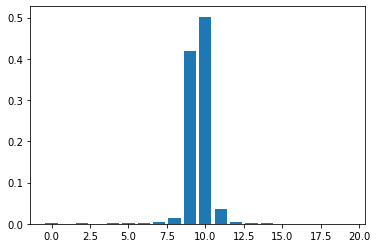

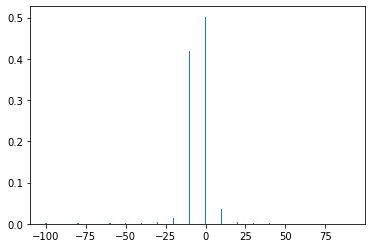

1


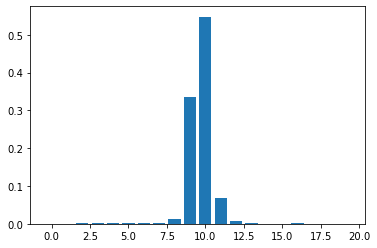

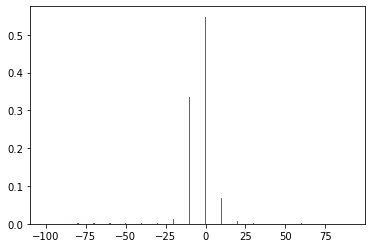

2


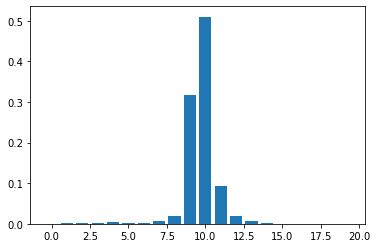

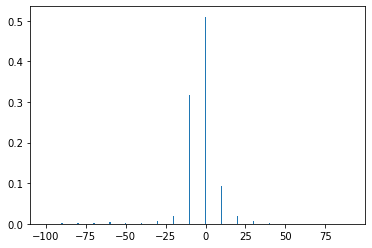

3


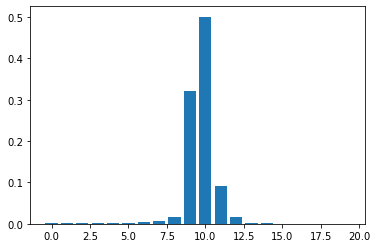

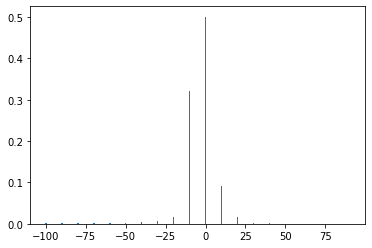

4


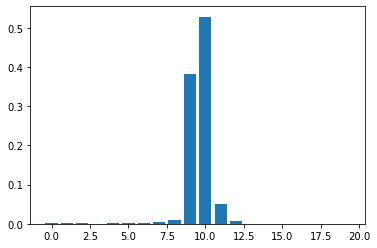

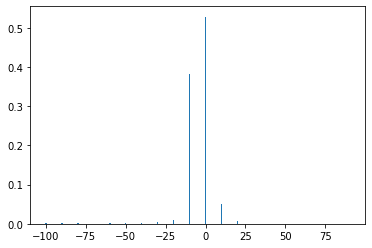

5


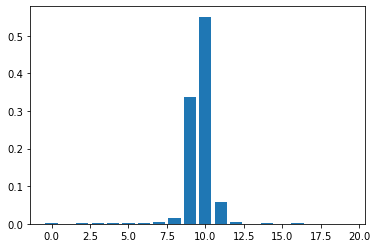

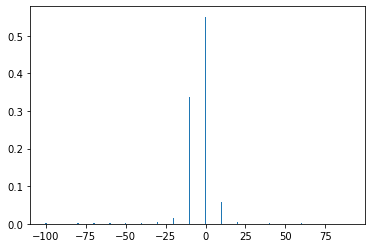

6


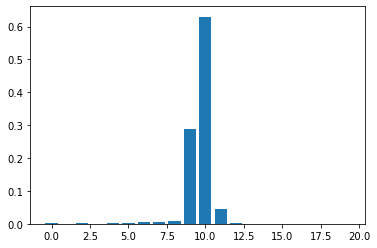

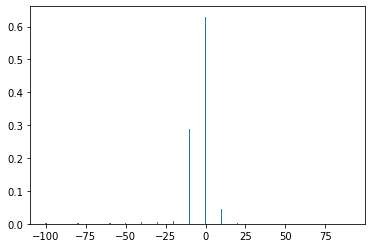

7


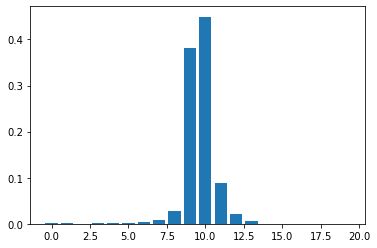

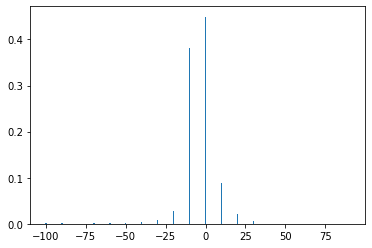

8


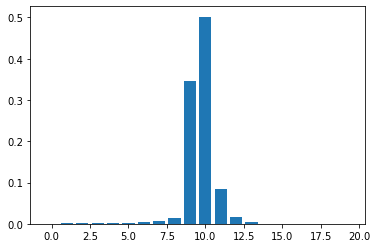

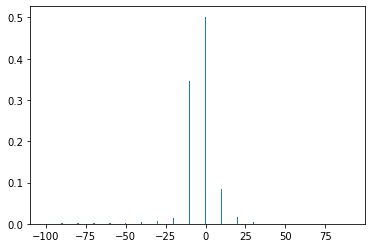

In [168]:
#Kész binning feldolgozás
#-100 és 100 között nézi az adatokat, 10es szakaszokra bontva, majd ezekben megszámolja, mennyi adat tartozik az adott szakszhoz
#Ezt a felbontást ezután eltárolja a data változóban mind a 9 résztvevőre

import matplotlib.pyplot as plt

testers = [arpi, katica, mate, ustokos, csilla, norbi, rozsa, tomi, tundi];
num_of_dys = (4);
num_of_avg = (5);
data = np.empty([(num_of_dys+num_of_avg), 20])

bins =  pd.IntervalIndex.from_tuples([(-100, -90), (-90, -80), (-80, -70), (-70, -60), (-60, -50), (-50, -40), (-40, -30), \
                                     (-30, -20), (-20, -10), (-10, 0), (0, 10), (10, 20), (20, 30), (30, 40), (40, 50), \
                                     (50, 60), (60, 70), (70, 80), (80, 90), (90, 100)]);

i = 0;
x = [-100, -90, -80, -70, -60, -50, -40, -30, -20, -10, 0, 10, 20, 30, 40, 50, 60, 70, 80, 90];

for person in testers:
    person.columns = ['dx'];
    s = person.loc[(person.dx > -100) & (person.dx < 100)];
   # s=person;
    d = (s.dx.value_counts(bins = bins, normalize = True, sort = False).reset_index());
    plt.bar(d.index, d.dx);
    print(i)
    data[i] = d.dx;
    plt.figure()
    plt.bar(x, data[i])
    plt.show()
    i += 1;
    
y = np.ones(num_of_dys)
y = np.append(y, np.zeros(num_of_avg))

0


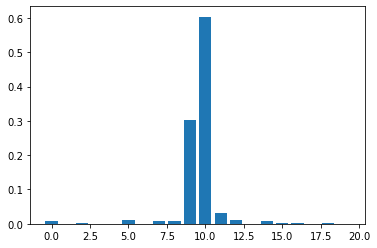

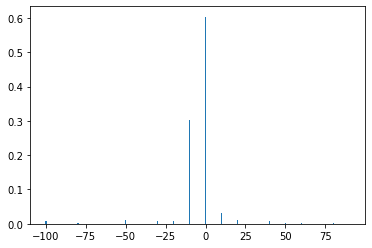

1


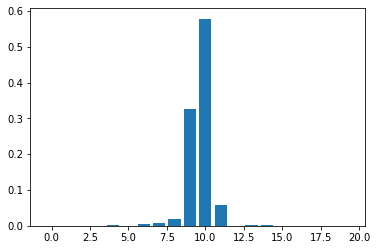

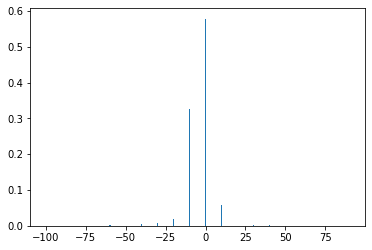

2


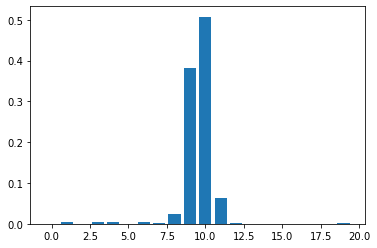

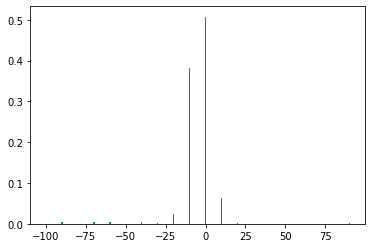

3


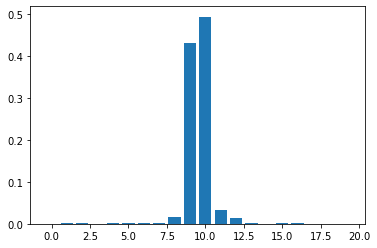

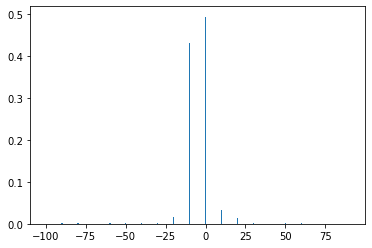

4


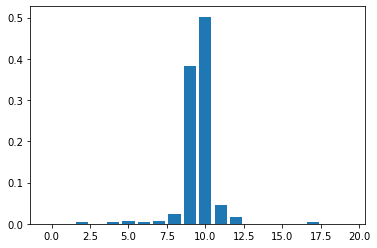

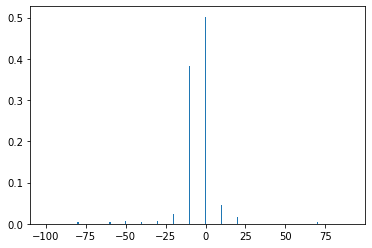

5


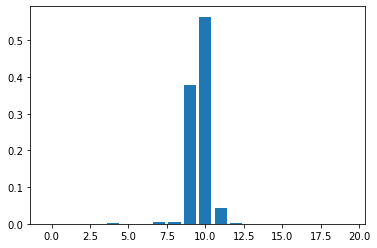

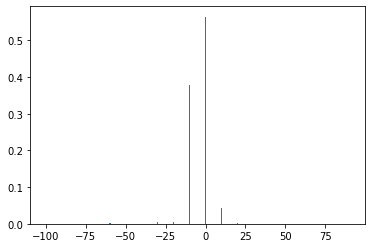

6


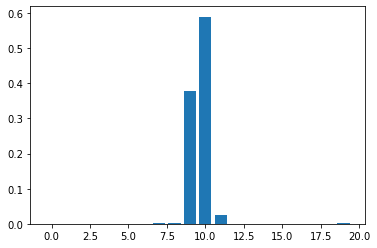

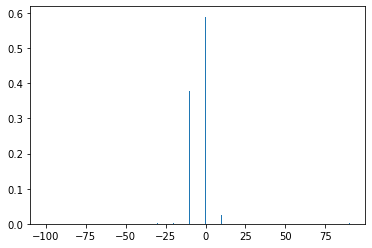

7


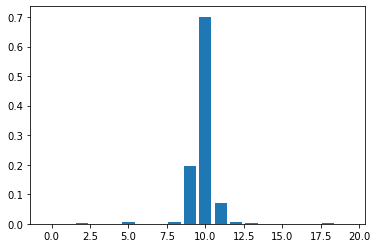

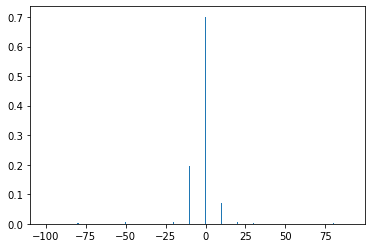

8


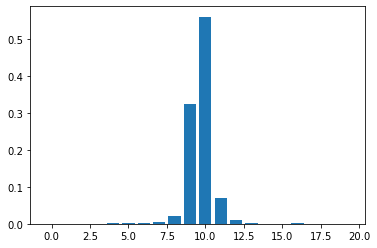

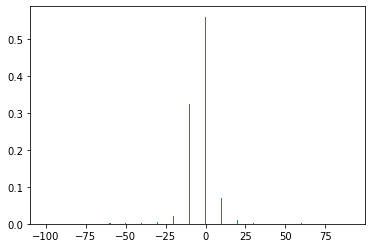

9


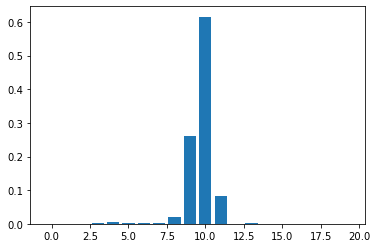

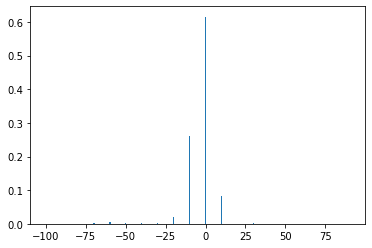

10


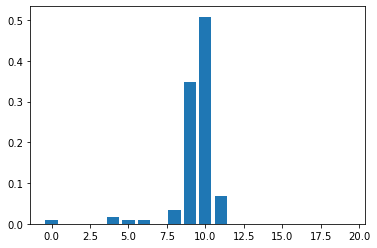

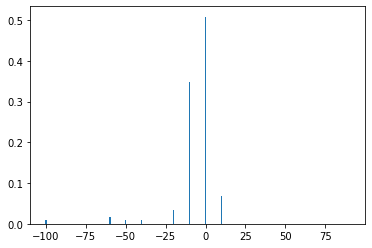

11


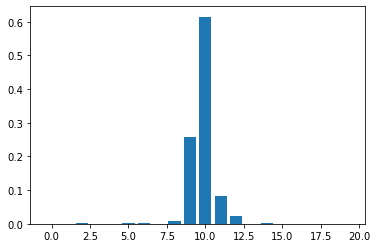

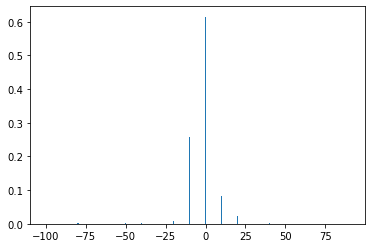

12


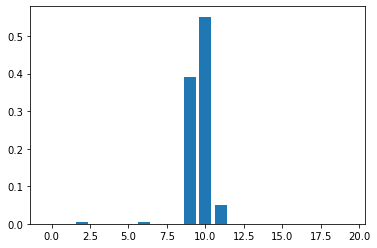

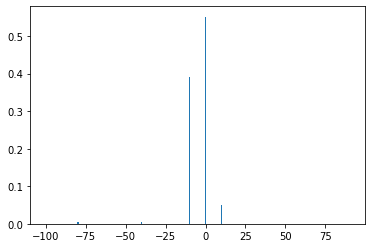

13


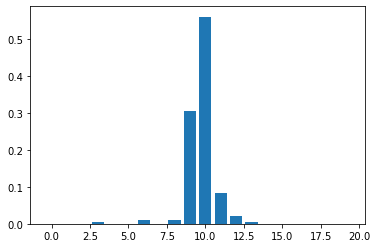

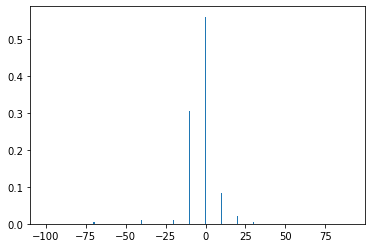

14


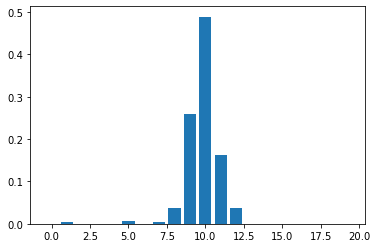

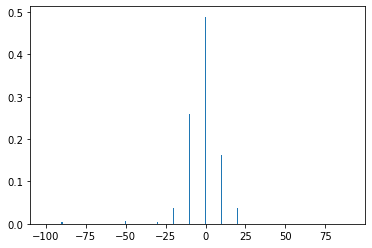

15


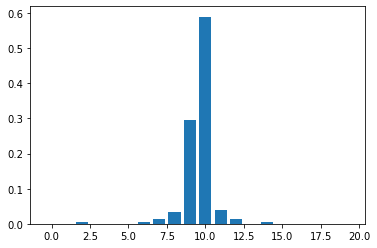

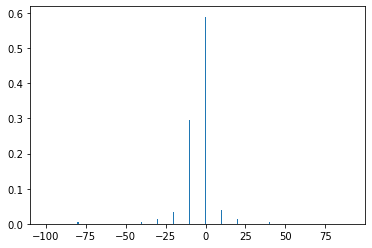

16


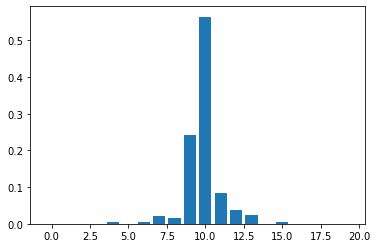

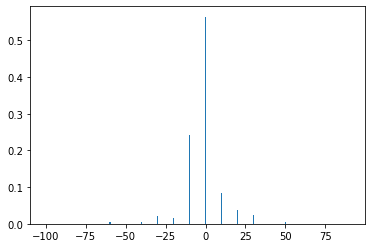

17


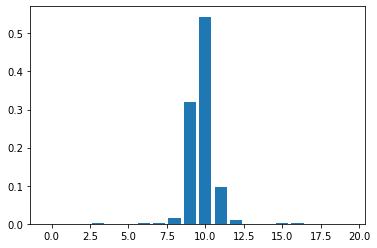

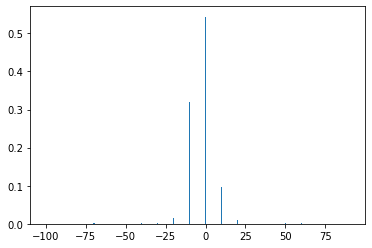

18


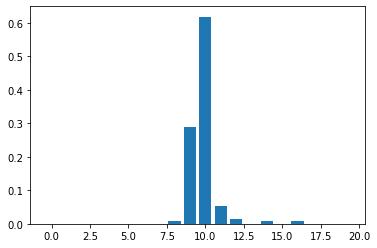

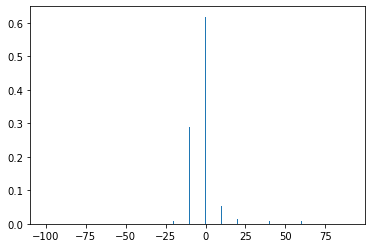

19


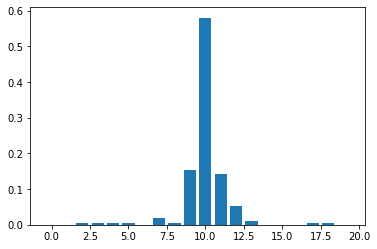

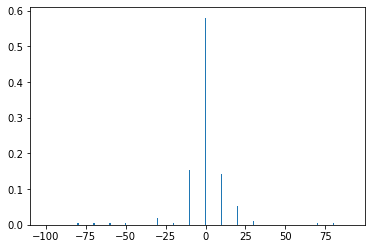

20


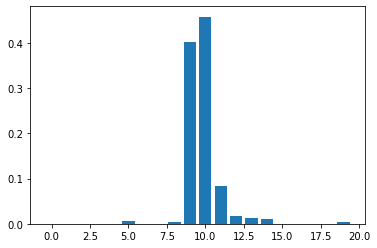

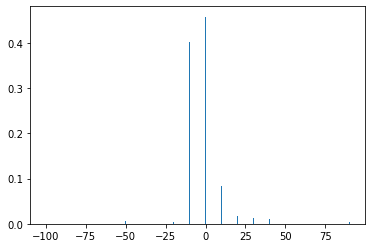

21


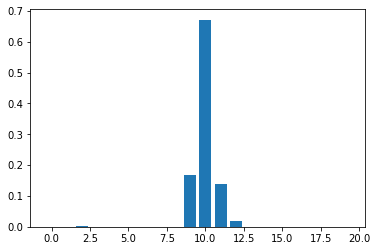

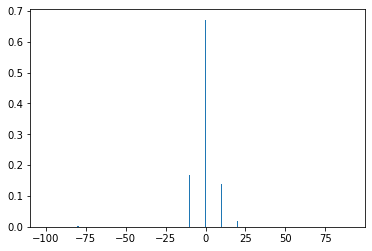

22


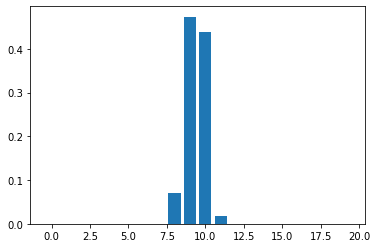

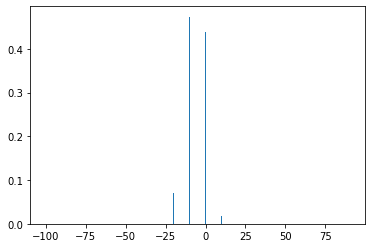

23


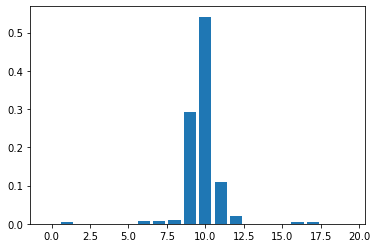

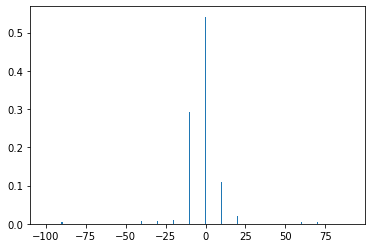

24


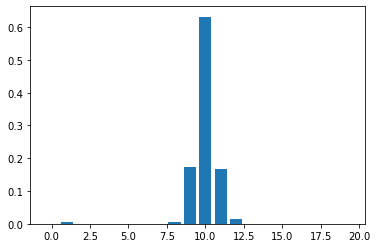

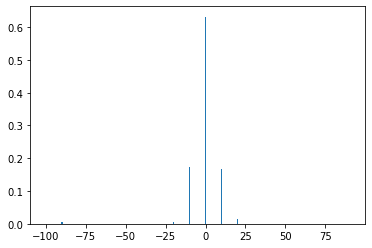

25


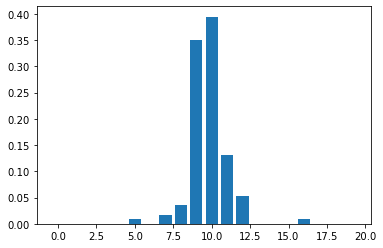

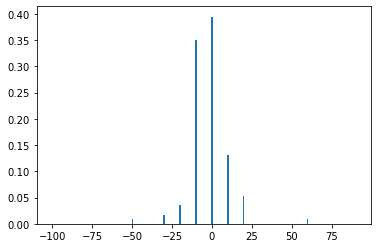

26


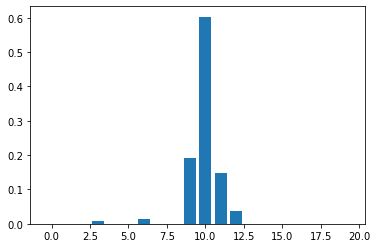

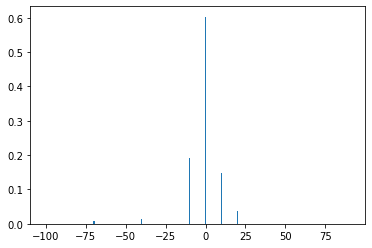

27


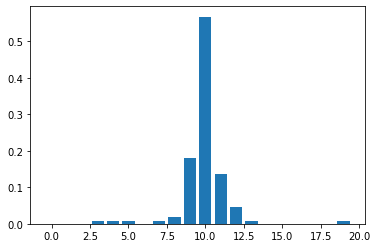

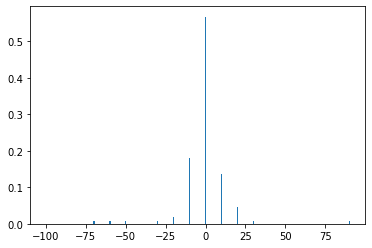

28


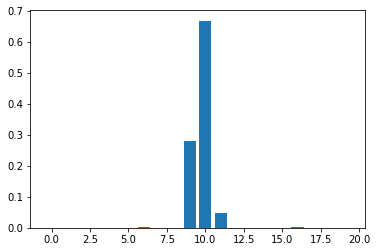

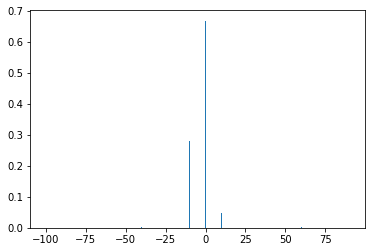

29


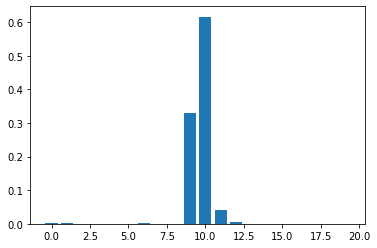

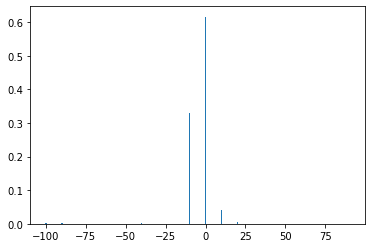

30


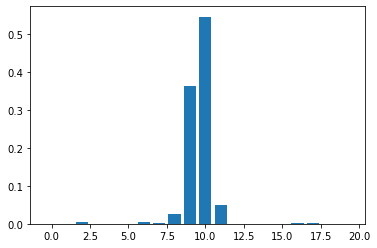

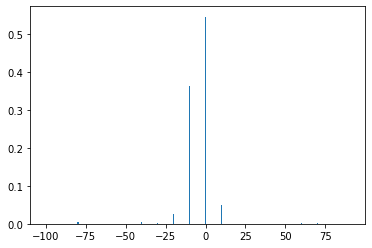

31


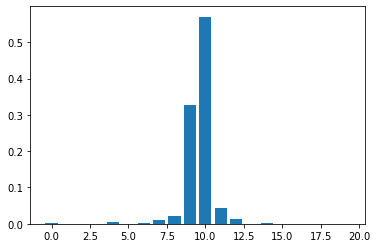

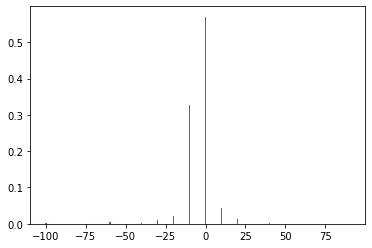

32


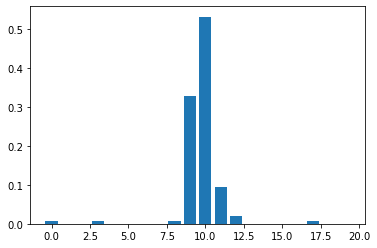

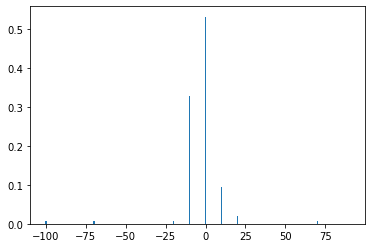

33


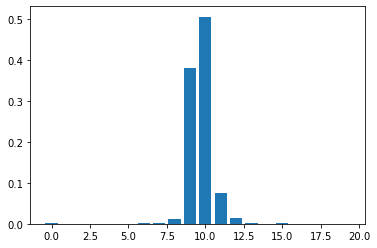

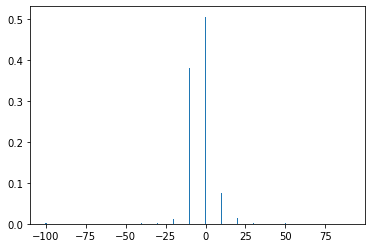

34


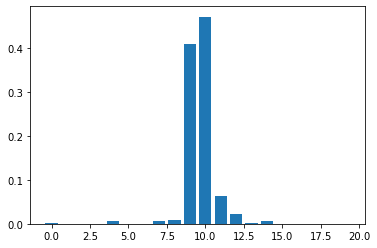

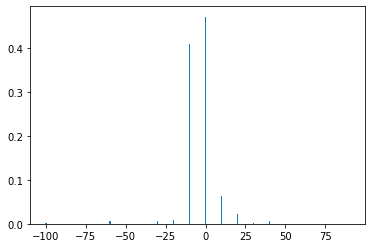

35


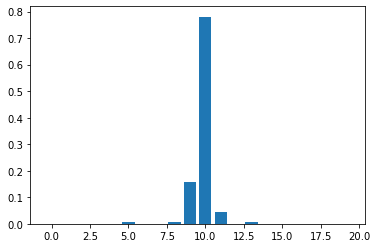

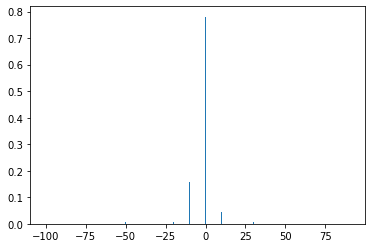

36


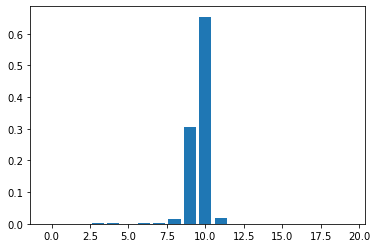

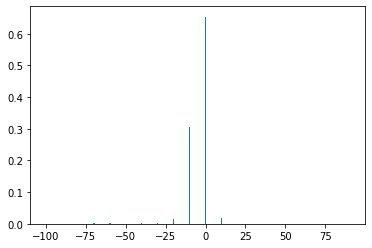

37


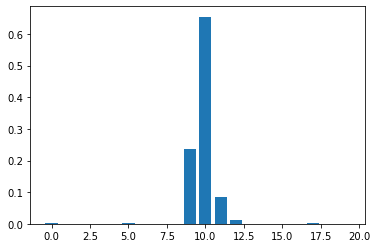

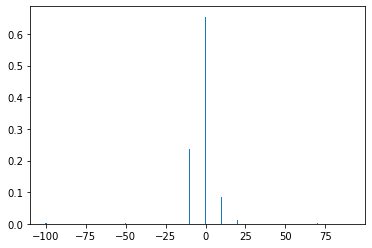

38


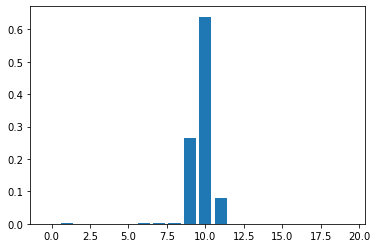

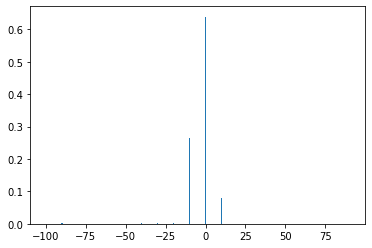

39


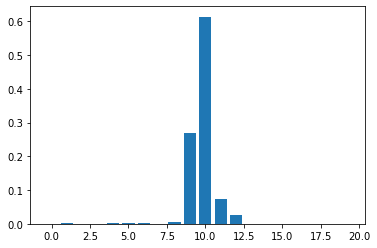

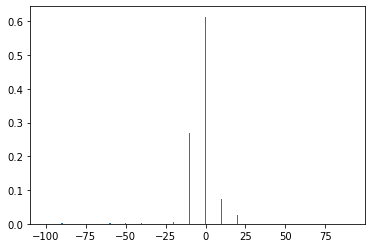

40


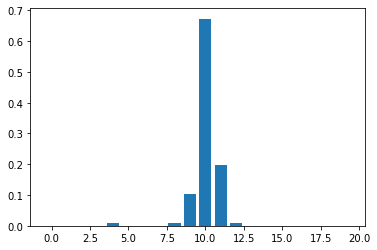

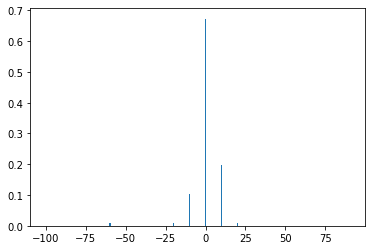

41


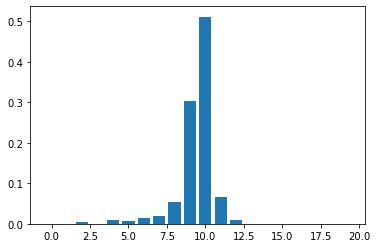

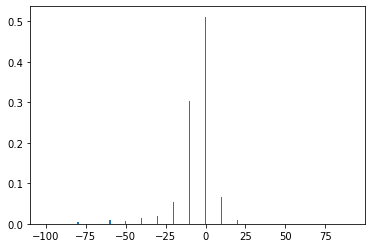

42


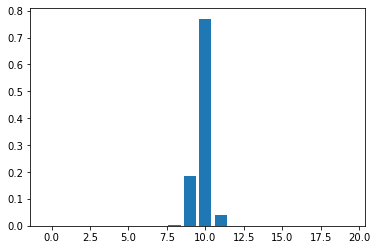

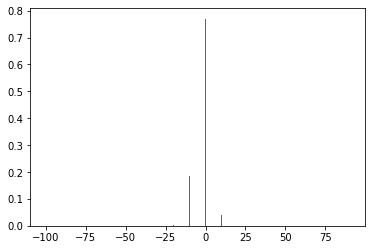

43


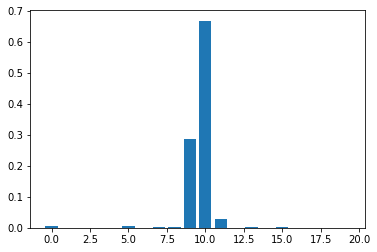

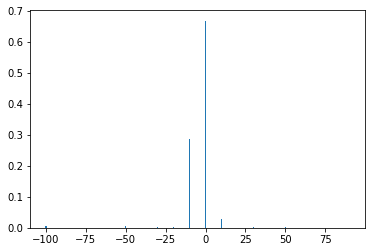

44


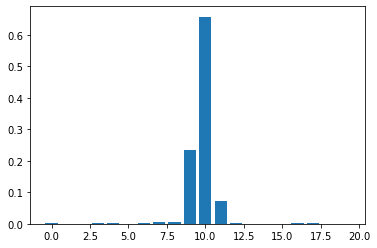

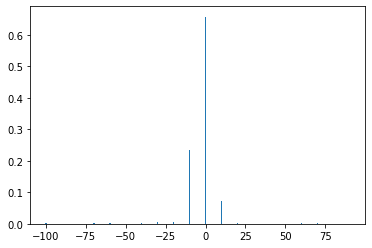

45


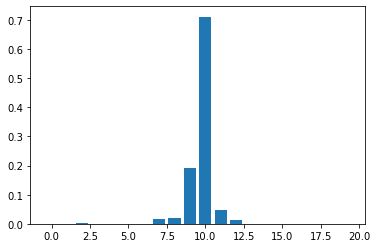

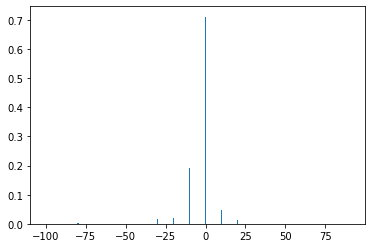

46


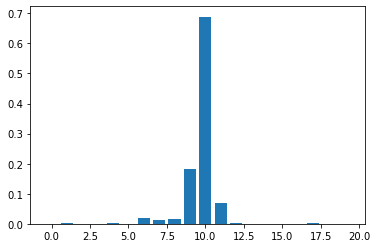

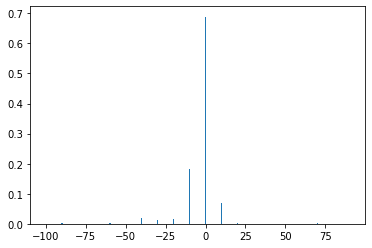

47


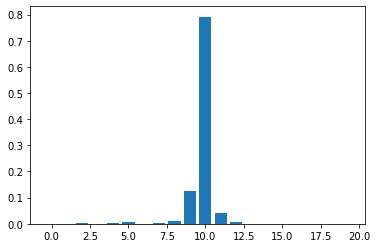

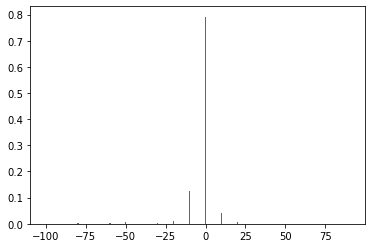

48


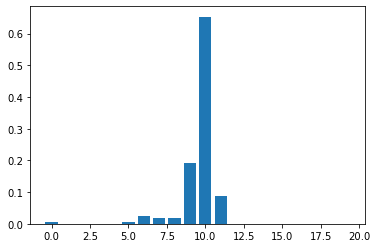

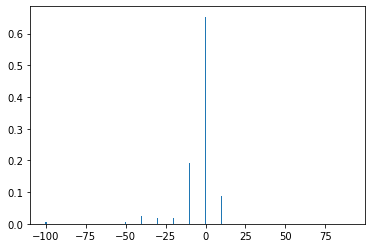

49


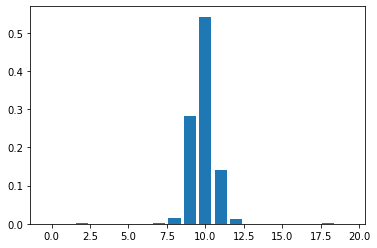

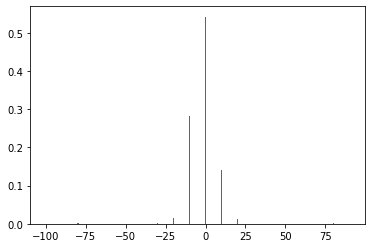

50


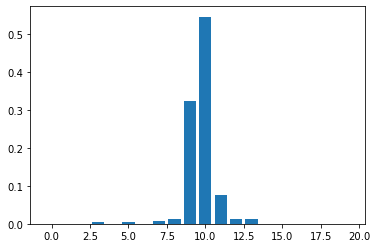

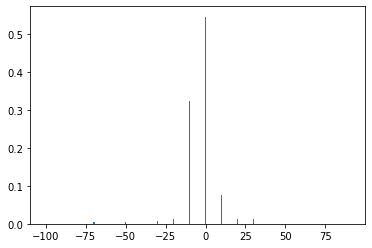

51


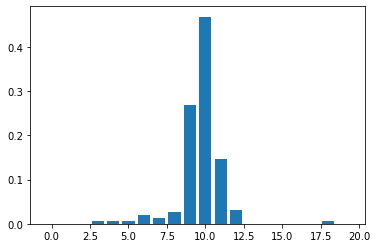

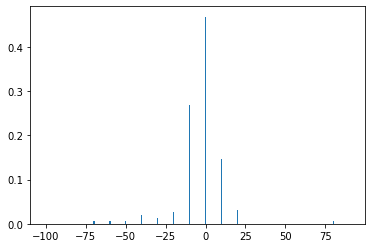

52


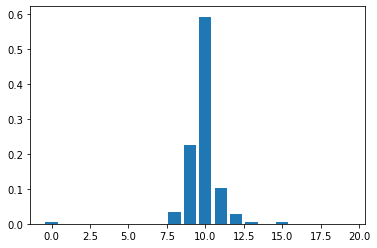

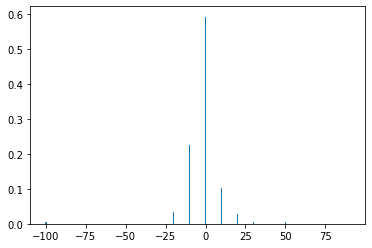

53


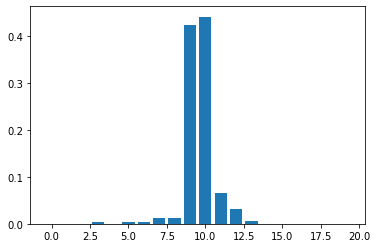

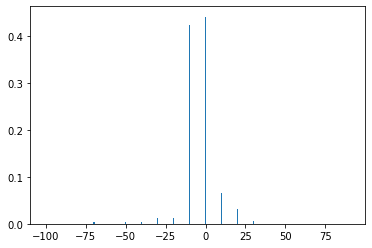

54


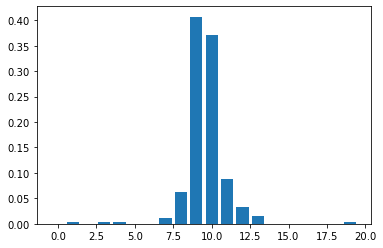

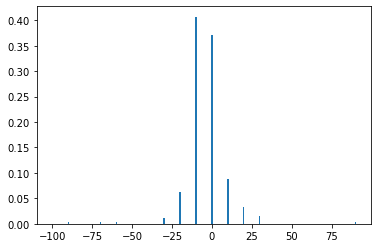

55


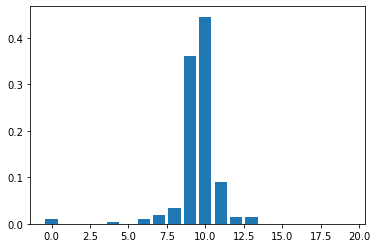

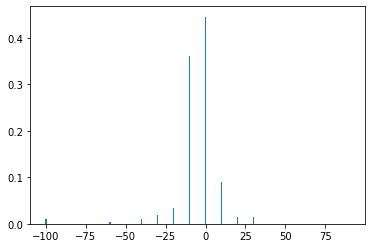

56


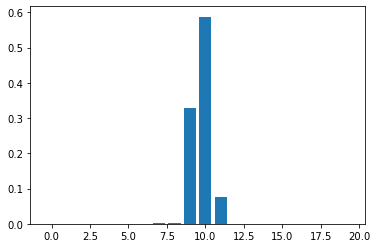

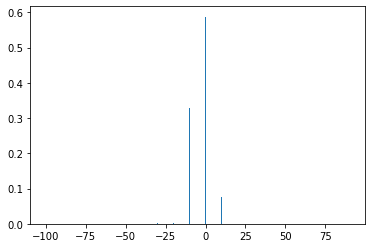

57


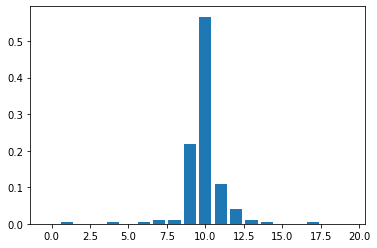

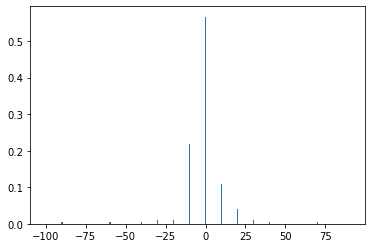

58


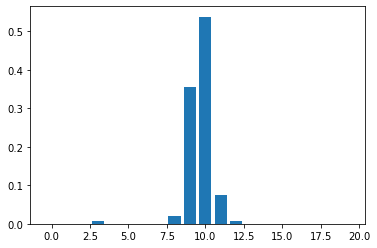

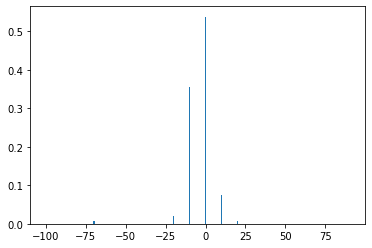

59


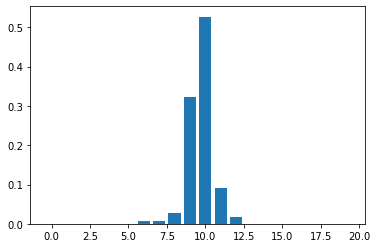

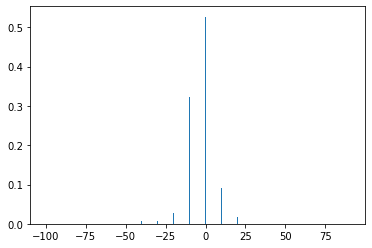

60


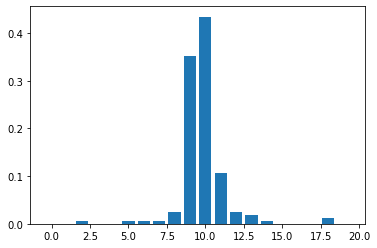

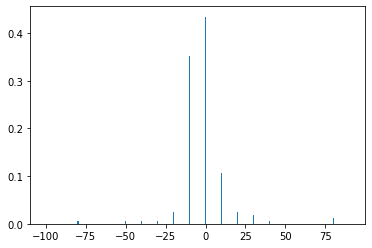

61


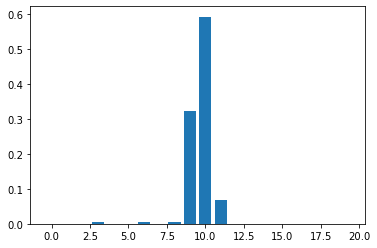

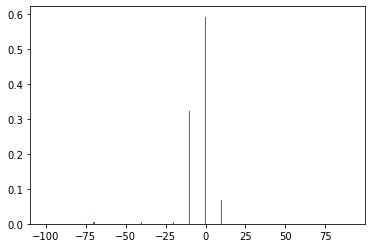

62


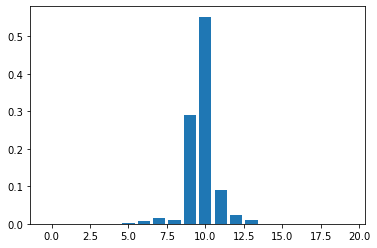

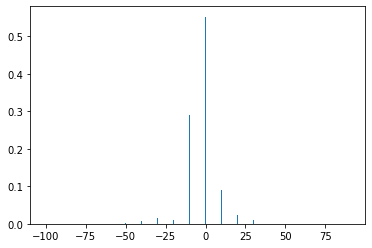

In [19]:
#Binning with the lines separated

#line = arpi[0];
#line = line.dropna();
#print(line)


import matplotlib.pyplot as plt

testers = [arpi, katica, mate, ustokos, csilla, norbi, rozsa, tomi, tundi];
num_of_dys = (32);
num_of_avg = (40);
data = np.empty([(num_of_dys+num_of_avg), 20])

bins =  pd.IntervalIndex.from_tuples([(-100, -90), (-90, -80), (-80, -70), (-70, -60), (-60, -50), (-50, -40), (-40, -30), \
                                     (-30, -20), (-20, -10), (-10, 0), (0, 10), (10, 20), (20, 30), (30, 40), (40, 50), \
                                     (50, 60), (60, 70), (70, 80), (80, 90), (90, 100)]);

i = 0;
x = [-100, -90, -80, -70, -60, -50, -40, -30, -20, -10, 0, 10, 20, 30, 40, 50, 60, 70, 80, 90];

for person in testers:
    for j in range(0, 7):
        line = person[j];
        line = line.dropna();
        
        line = line.to_frame();
        line.columns = ['dx']
        s = line.loc[(line.dx > -100) & (line.dx < 100)];
        d = (s.dx.value_counts(bins = bins, normalize = True, sort = False).reset_index());
        plt.bar(d.index, d.dx);
        print(i)
        data[i] = d.dx;
        plt.figure()
        plt.bar(x, data[i])
        plt.show()
        i += 1;
    
y = np.ones(num_of_dys)
y = np.append(y, np.zeros(num_of_avg))

In [20]:
print(data)
print(y)

[[0.00689655 0.         0.00344828 ... 0.         0.00344828 0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.00377358 0.         ... 0.         0.         0.00188679]
 ...
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]]
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


In [23]:
#Loading of the results of the Matlab evaluation
data_mat = pd.read_csv("C:\prog\Matlab\c2.txt", delimiter=' ')
y = [1, 1, 1, 1, 0, 0, 0, 0, 0]
data_mat

,num,avg,sf,bf,reg,sr,br
0,1130,2.59,145,70,292,194,98
1,1045,2.77,146,73,194,146,64
2,835,4.71,182,98,232,161,71
3,1125,4.40,235,77,319,223,97
4,1120,2.57,167,87,253,178,75
5,1130,2.35,159,66,227,159,69
6,1125,2.14,141,94,263,148,115
7,1160,2.79,92,63,230,143,87
8,1045,3.89,175,82,333,248,85


In [21]:
# Import train_test_split function
from sklearn.model_selection import train_test_split

# Split dataset into training set and test set, first argument can be data/df_encoded/data_mat
X_train, X_test, y_train, y_test = train_test_split(data, y, test_size=0.3,random_state=109) # 70% training and 30% test

#type(X_train)
#X_train

In [47]:
#Import svm model
from sklearn import svm

#Create a svm Classifier
clf = svm.SVC(kernel = 'sigmoid') #linear, poly, rbf, sigmoid kernels

#Train the model using the training sets
clf.fit(X_train, y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

y_pred


array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.])

In [48]:
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics

# Model Accuracy: how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.5454545454545454


In [54]:
#Cross-validation
from sklearn.model_selection import cross_val_score
scores = cross_val_score(clf, data, y, cv=5) #Second argument can be data/df_encoded/data_mat
print("%0.2f accuracy with a standard deviation of %0.2f" % (scores.mean(), scores.std()))

0.49 accuracy with a standard deviation of 0.05
